# 적합한 ARIMA 모델 선택 방법?

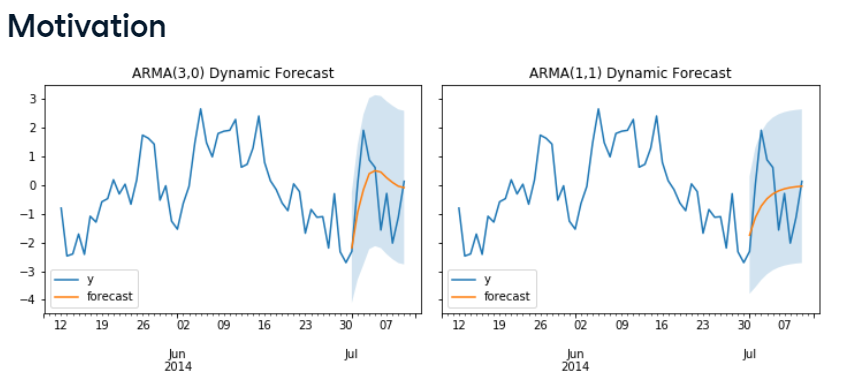



# ACF
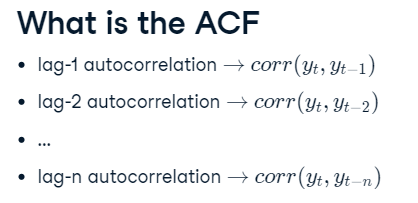

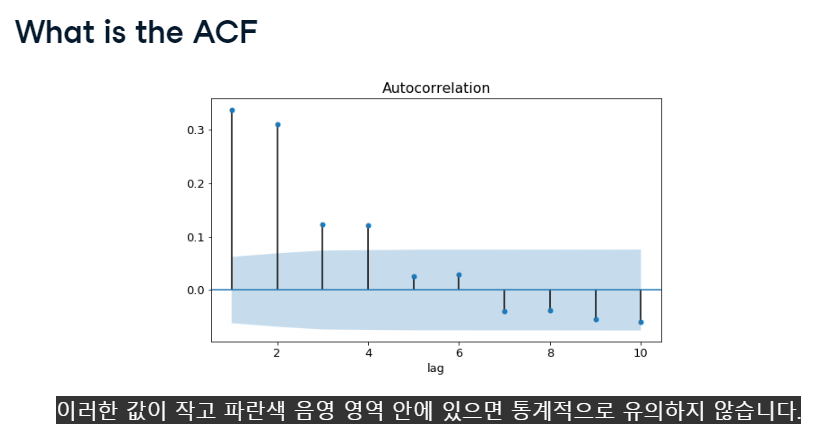

파란색 음영 안에 있으면 통계적으로 유의하지 않다.



# PACF

* 특정 시점과 더 작은 시점에서 그 사이간 상관관계를 뺀 둘 만의 lag를 생각해 그와 관련된 상관관계.
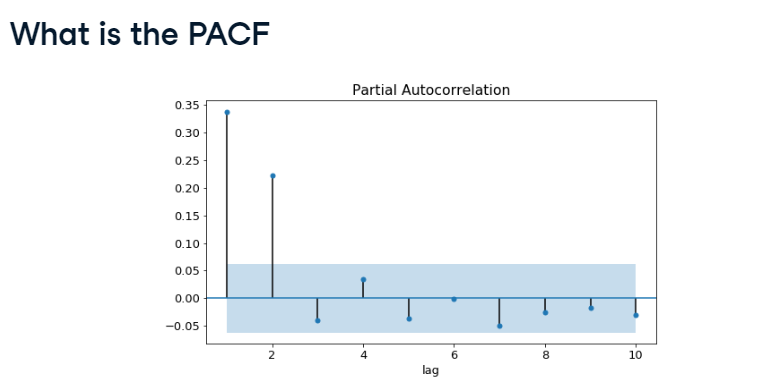





# Choosing Model

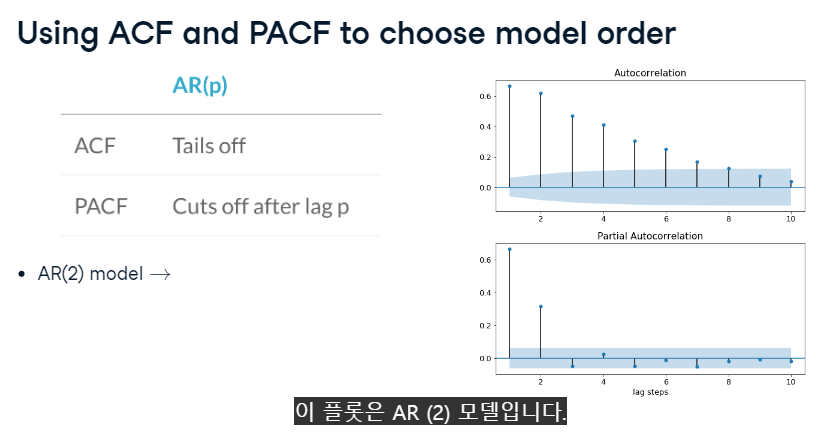

* A. AR(2)

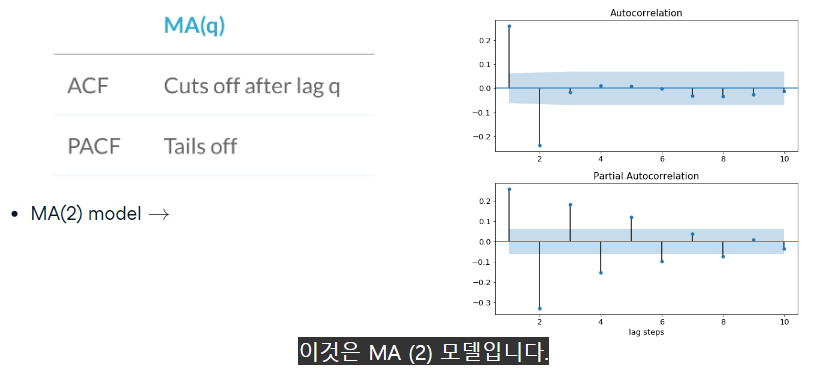

* A. MA(2)

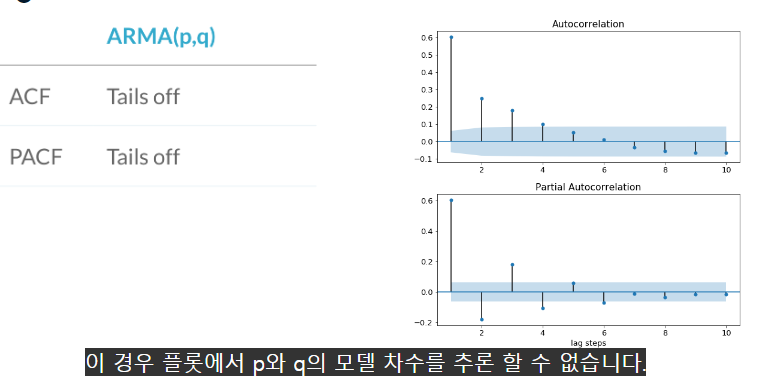

* A, 이 경우 ACF PACF 모두 tails off로, 모델 정확한 차수 p,q를 알 수 없음.





# 정리

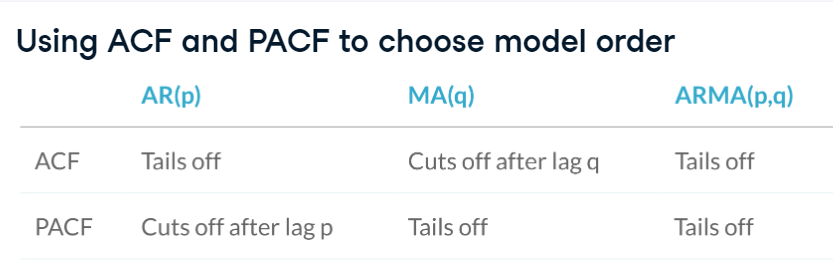

# ACF와 PACF를 만드는 두 가지 함수.

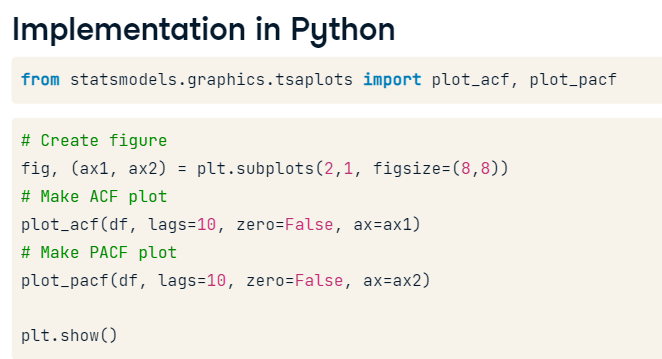

* 보고자 하는 최대 지연 수 lags
* zero -> 시차 0에서 자기 상관 표시 여부 (lag = 0에서 PACF = ACF = 1 이니 플롯 단순화 용으로 인수를 false. )
* 마지막으로 플롯할 축.


<결과>
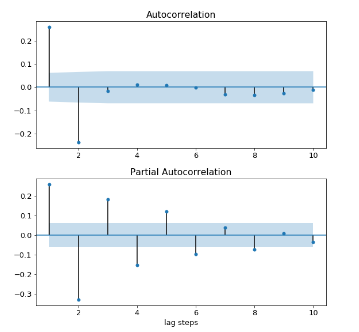

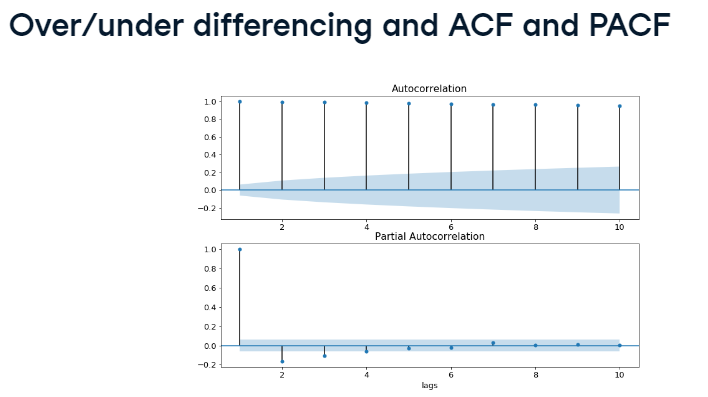

* ACF 값이 높고 매우 느리게 끝나면 데이터 비정상으로 차분 필요.

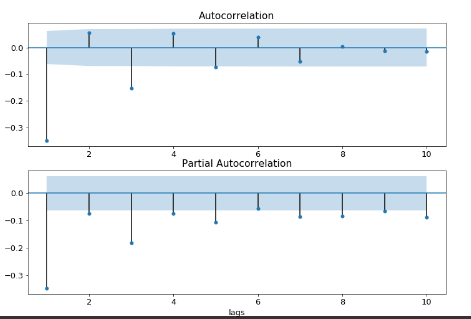

* 자기 상관 음수가 매우 크면 지나친 차분을 했다는 의미.

In [1]:
# 퀴즈 1-1-1

# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()


NameError: ignored

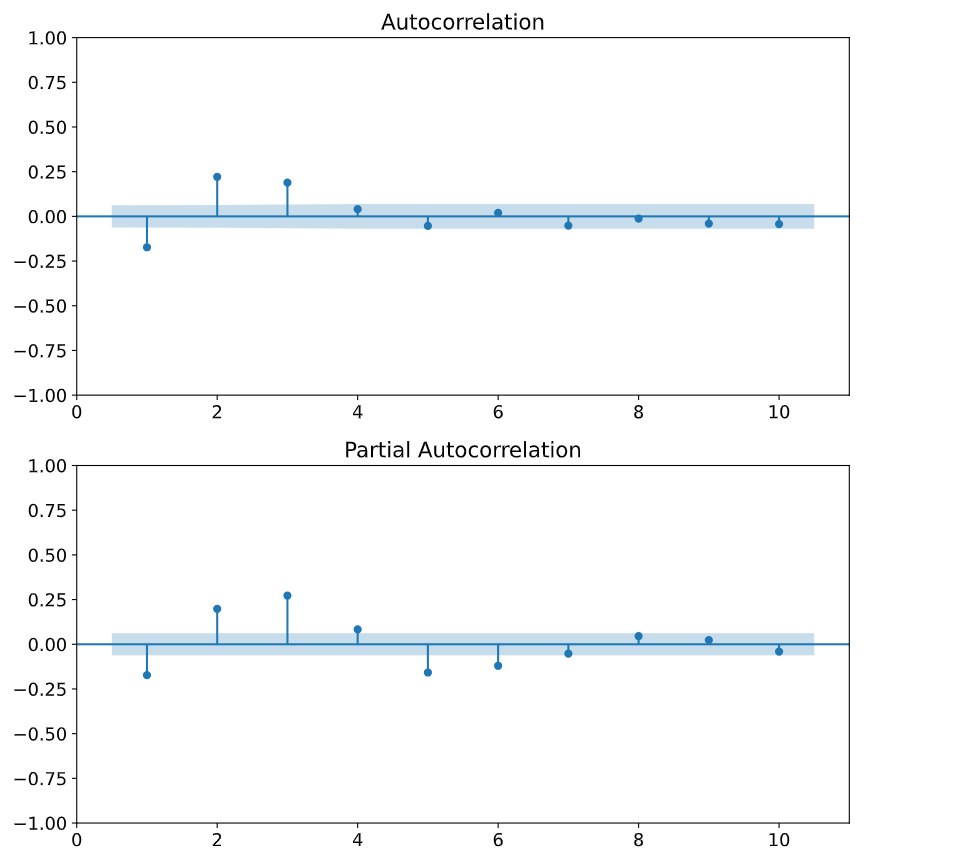

퀴즈 1-1-2
* 위 ACF PACF를 통해 MA(3). ACF를 보면 lag 3이후에 다 파란 영역안에 들어가있고, PACF는 확실한건 cut off가 없다.

In [ ]:
# 퀴즈 1-2-1

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

퀴즈 1-2-1 plot
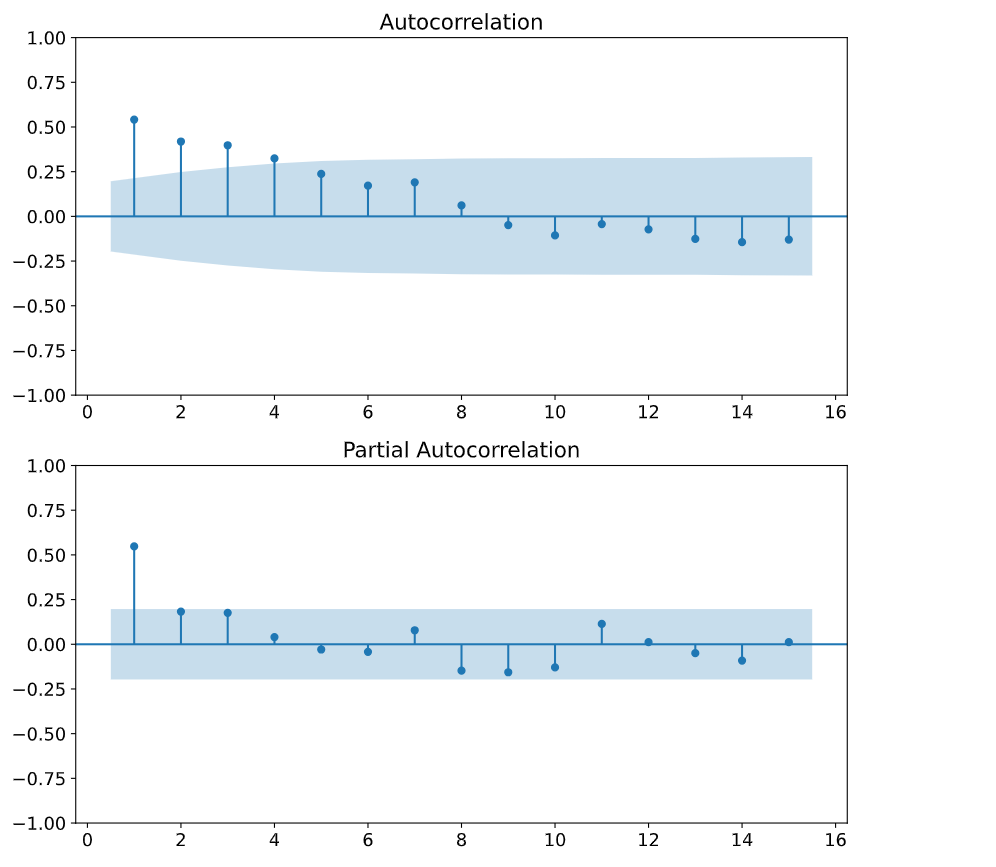

퀴즈 1-2-2
* 상단 plot의 적합한 모델은 AR(1).

In [2]:
# 퀴즈 1-2-3

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model #AR(1)모델이었기에 이에 맞게 ARIMA 모델에 학습.
model = ARIMA(earthquake, order =(1,0,0))

# Train model
results = model.fit()

NameError: ignored

# AIC : Akaike information criterion

정보 기준 or AIC 는 모델이 얼마나 성능을 나타내는 지표.
* AIC 점수가 낮을수록 좋다.
* 매개변수가 많으면 페널티.
* 데이터에 비해 차수를 높게 설정 시 페널티.

# BIC : Bayesian information criterion

* AIC와 유사.
* BIC 점수가 낮을수록 좋은 모델.
* 복잡한 모델에 페널티.

# AIC vs BIC : 차이점은 모델 복잡성에 패널티를 주는 정도.
* BIC는 AIC보다 더 심플한 모델을 선호.
* 좋은 예측 모델을 찾는다면 AIC.
* 더 좋은 설명 모델을 찾는다면 BIC.

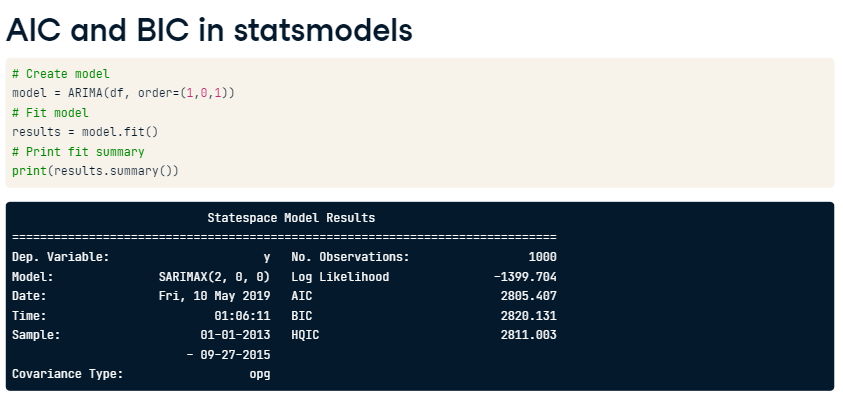

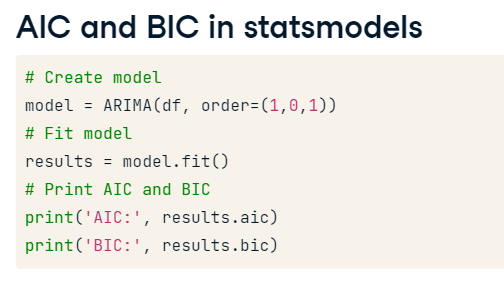
* AIC : 2806.36
* BIC : 2821.09

여러 ARIMA 모델을 데이터셋에 맞춰 루프를 통해 최상의 모델 순서를 찾을 수 있다.

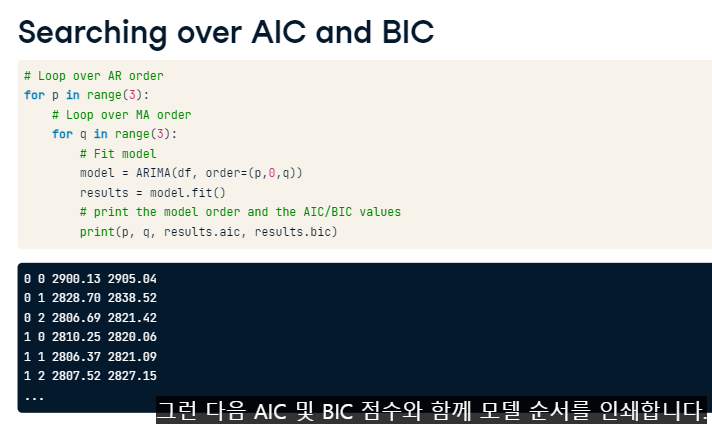

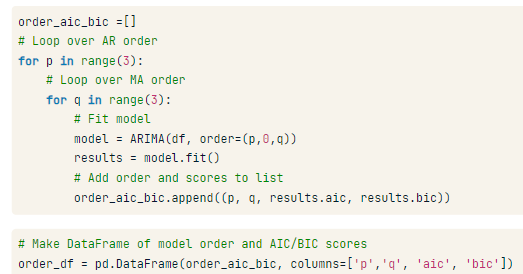

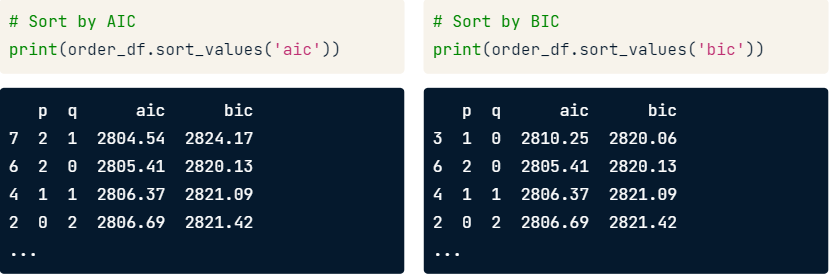

* 좋은 예측 모델이면 AIC가 가장 낮은 모델 ARMA(2,1)

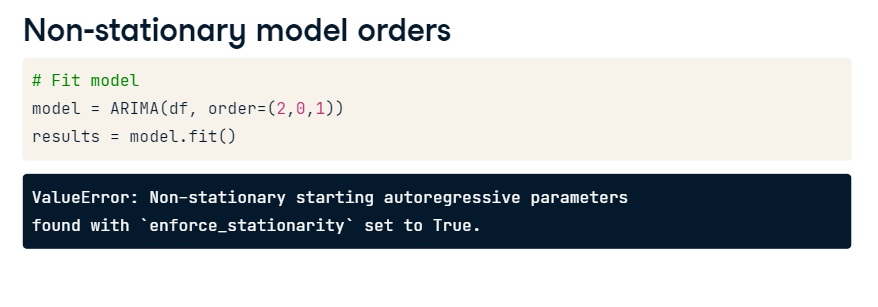

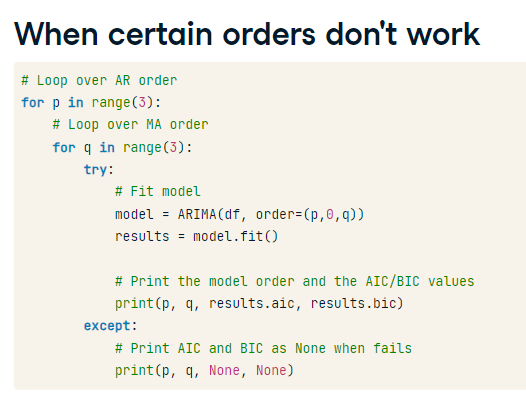

실행되지 않을 때는 except 문으로 넘어간다.

퀴즈 2- 1 plot
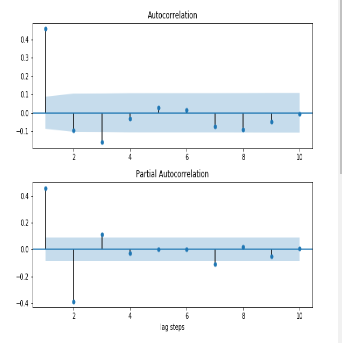

In [4]:
# 퀴즈 2-1

# Loop over values of p from 0-2.
# Loop over values of q from 0-2.
# Train and fit an ARMA(p,q) model.
# Append a tuple of (p,q, AIC value, BIC value) to order_aic_bic.

# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = ARIMA(df, order=(p,0,q))
        results = model.fit()

        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

# print(order_aic_bic)
# [(0, 0, 1615.1975370034902, 1623.6267532003346), (0, 1, 1430.6563682434335, 1443.3001925387),
#  (0, 2, 1426.0200865874065, 1442.8785189810953), (1, 0, 1498.437872191206, 1511.0816964864725),
#  (1, 1, 1428.9270600060709, 1445.7854923997597), (1, 2, 1417.8921288725617, 1438.9651693646726),
#  (2, 0, 1419.0669418543594, 1435.9253742480482), (2, 1, 1414.5360200642672, 1435.6090605563782),
#  (2, 2, 1416.4313342792175, 1441.7189828697506)]

NameError: ignored

In [ ]:
# 퀴즈 2-2-1

# Create a DataFrame to hold the order search information in the order_aic_bic list.
#  Give it the column names ['p', 'q', 'AIC', 'BIC'].
# Print the DataFrame in order of increasing AIC and then BIC.

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

In [5]:
# 퀴즈 2-2-2

# <script.py> output:

#        p  q       AIC       BIC
#     7  2  1  1414.249  1431.107
#     6  2  0  1419.109  1431.753
#     5  1  2  1417.030  1433.888
#     8  2  2  1416.085  1437.158
#     2  0  2  1425.057  1437.701
#     1  0  1  1429.989  1438.418
#     4  1  1  1428.052  1440.696
#     3  1  0  1497.308  1505.737
#     0  0  0  1615.494  1619.708

# 여기서 가장 fit한 모델은 AMRA

<퀴즈 2-3>

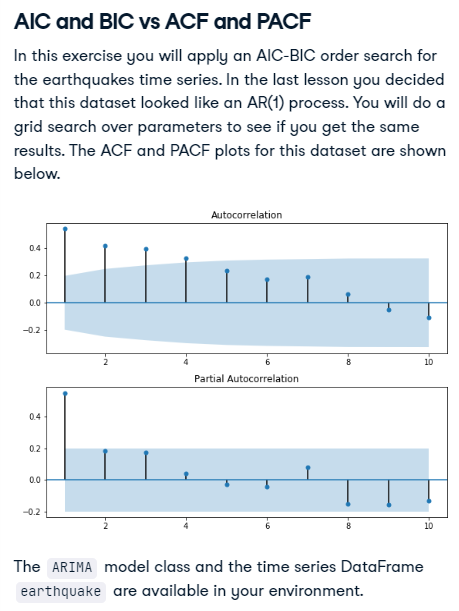

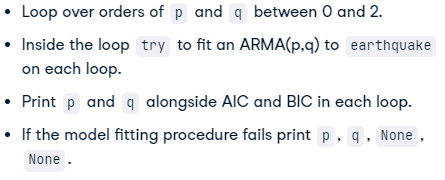


In [6]:
# 퀴즈 2-3
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):

        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake, order=(p,0,q))
            results = model.fit()

            # Print order and results
            print(p, q, results.aic, results.bic)

        except:
            print(p, q, None, None)


# <script.py> output:
#     0 0 676.5443594984636 681.7345991987328
#     0 1 654.8468586200252 662.6322181704289
#     0 2 651.733227051897 662.1137064524353
#     1 0 643.9676770992027 651.7530366496064
#     1 1 640.4562835911981 650.8367629917365
#     1 2 642.3808673565673 655.3564666072402
#     2 0 642.7338539385339 653.1143333390722
#     2 1 647.4406643641798 660.4162636148528
#     2 2 642.4685896288877 658.0393087296952

0 0 None None
0 1 None None
0 2 None None
1 0 None None
1 1 None None
1 2 None None
2 0 None None
2 1 None None
2 2 None None


모델 구축 이후에 진단을 통해 모델이 제대로 작동하는지 확인.
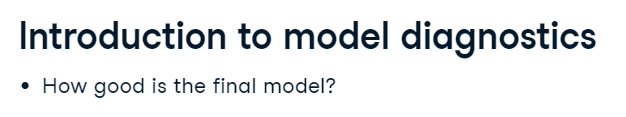

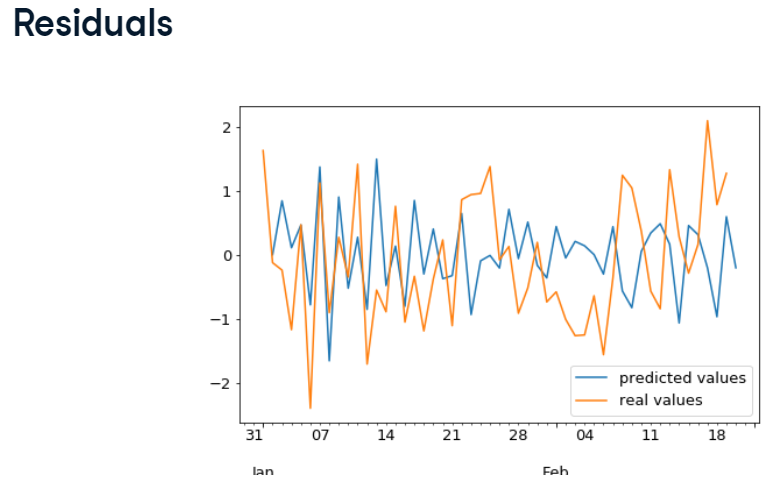

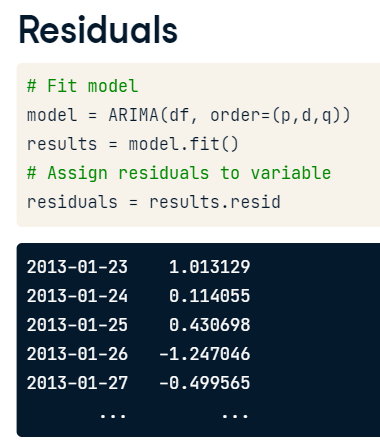

## Residual

# Mean absolute error

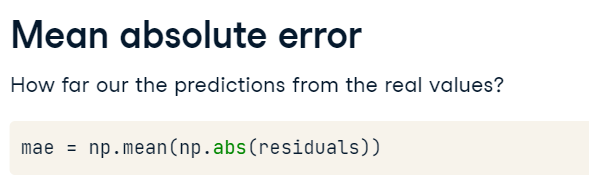

# Plot diagnostics

* 이상적이 모델의 경우 잔차는 0을 중심으로 서로 상관되지 않은 백색 가우스 잡음.

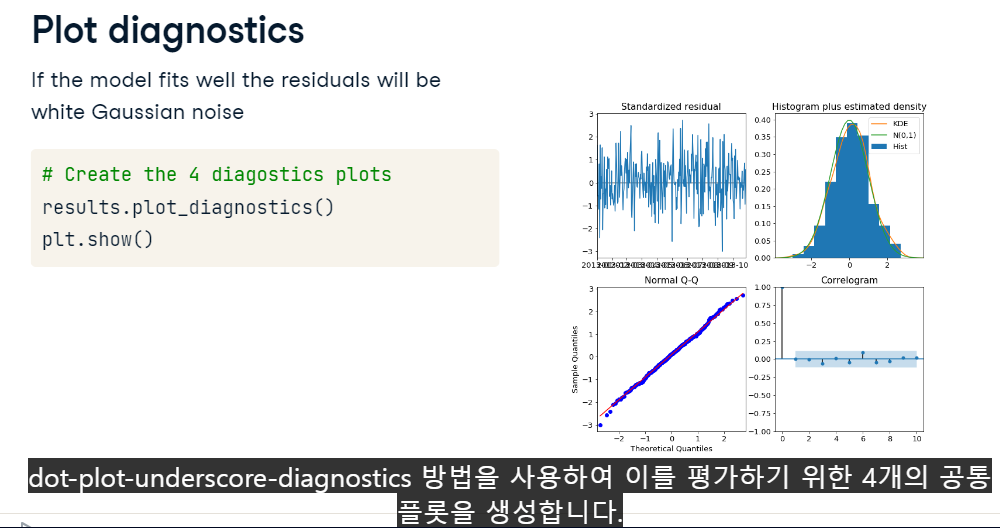

### 1. Residual plot  standardized residual

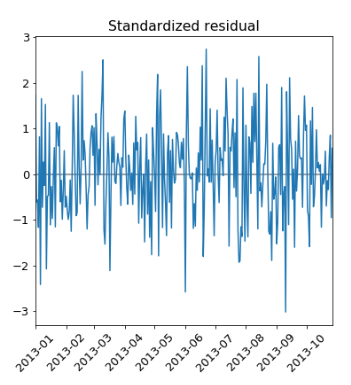

모델이 올바르게 작동 시 잔차에 명확한 구조가 없다. 예시로
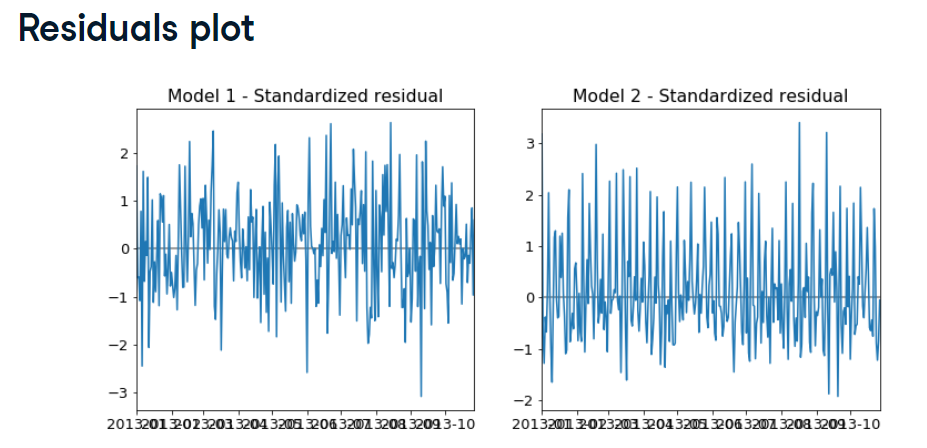

모델1은 명백한 패턴이 없지만 모델2는 있음.

### 2. Histogram plus estimated density 잔차 분포

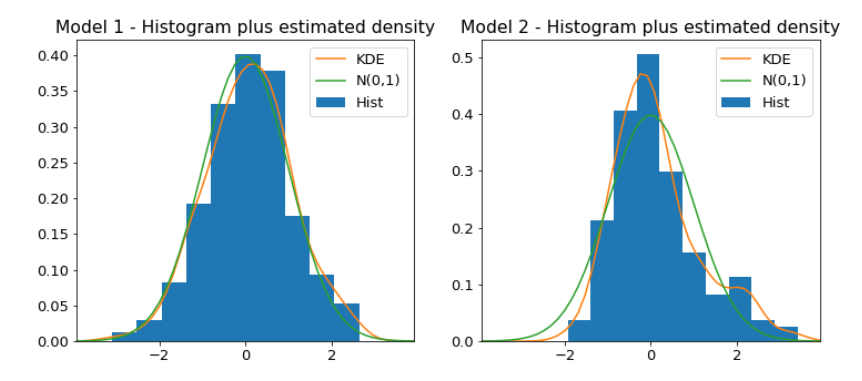

* 주황색 선은 히스토그램의 평활버전, 녹색 선은 정규분포. 좋은 모델일 수록 두 라인이 거의 같게 나온다. 여기선 왼쪽이 더 좋음.

### 3. Normal Q-Q

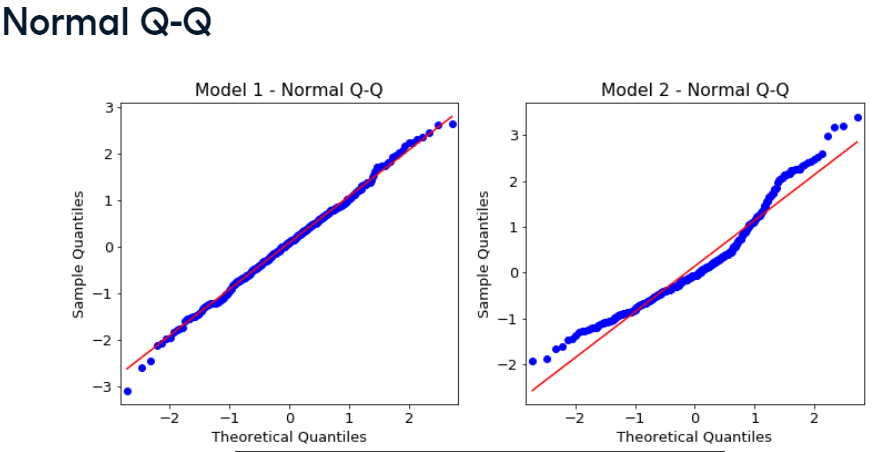

* 잔차가 정규분포 따르면 대부분 빨간 선을 따름.

### 4. Correlogram '잔차'의 ACF.

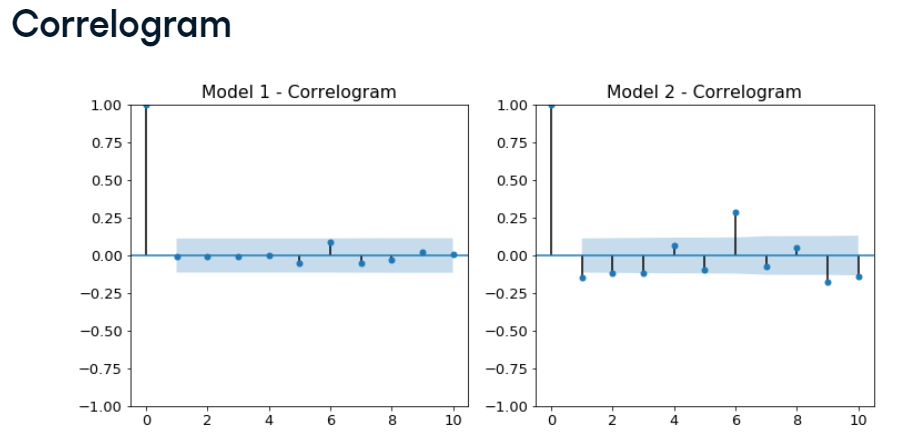

* 0 보다 큰 시차에 대한 상관 관계의 95%는 중요하지 않아야함.
* 잔차에 유의한 상관관계가 있다면 모델에 우리가 캡쳐하지 못한 정보가 들어있다는 것.

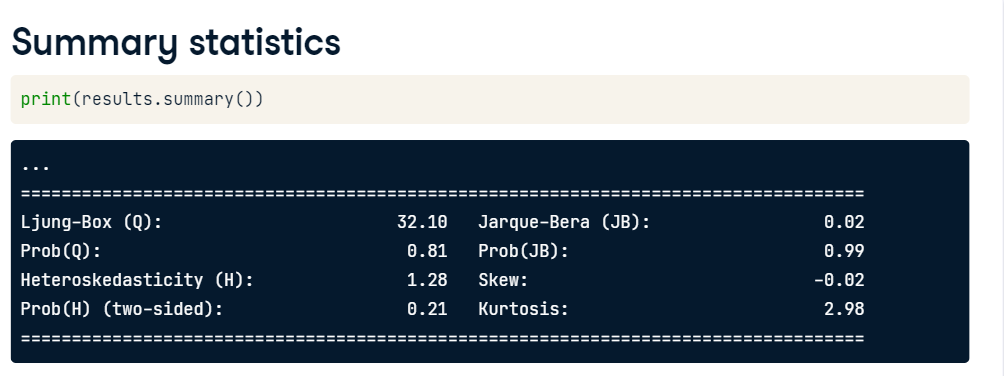

* Prob(Q) 는 잔차에 상관구조가 없다는 귀무가설과 관련한 p-value. H0 : Residuals are uncorrelated
* Prob(JB) : 잔차가 가우스 정규 분포를 따른다는 귀무가설과 관련된 p-value. H0 : Residuals are normal.
* 저것들 0.05 유의수준보다 작으면 귀무가설을 기각.

In [7]:
# 퀴즈 3-1

# Fit model
model = ARIMA(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

NameError: ignored

# 퀴즈 3-2-1
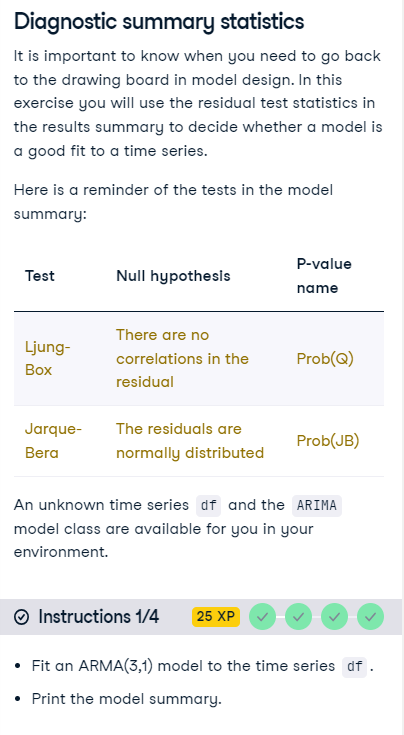

In [8]:
#퀴즈 3-2-1
# Create and fit model
model1 = ARIMA(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

# # Print summary
# print(results1.summary())
#                                SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                  400
# Model:                 ARIMA(3, 0, 1)   Log Likelihood                -555.394
# Date:                Fri, 18 Aug 2023   AIC                           1122.787
# Time:                        09:05:44   BIC                           1146.736
# Sample:                    01-01-2013   HQIC                          1132.272
#                          - 02-04-2014
# Covariance Type:                  opg
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.0314      0.030      1.060      0.289      -0.027       0.090
# ar.L1          0.0163      0.109      0.150      0.881      -0.197       0.230
# ar.L2          0.2159      0.052      4.179      0.000       0.115       0.317
# ar.L3         -0.4551      0.050     -9.050      0.000      -0.554      -0.357
# ma.L1         -0.2650      0.114     -2.326      0.020      -0.488      -0.042
# sigma2         0.9388      0.065     14.460      0.000       0.812       1.066
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.75
# Prob(Q):                              0.97   Prob(JB):                         0.69
# Heteroskedasticity (H):               1.22   Skew:                            -0.07
# Prob(H) (two-sided):                  0.26   Kurtosis:                         3.15
# ===================================================================================


NameError: ignored

In [9]:
# 퀴즈 3-2-2
# Prob(Q) 와 Prob(JB)를 보면 유의수준 5%를 기준으로 전부 귀무가설을 기각할 수 없다.
# Thus , Residuals are not correlated and are normally distributed

In [ ]:
# 퀴즈 3-2-3

# Fit an AR(2) model to the time series df.
# Print the model summary.


# Create and fit model
model2 = ARIMA(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

# # Print summary
# print(results2.summary())
#                                SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                  400
# Model:                 ARIMA(2, 0, 0)   Log Likelihood                -590.964
# Date:                Fri, 18 Aug 2023   AIC                           1189.928
# Time:                        09:08:03   BIC                           1205.894
# Sample:                    01-01-2013   HQIC                          1196.251
#                          - 02-04-2014
# Covariance Type:                  opg
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const          0.0341      0.051      0.662      0.508      -0.067       0.135
# ar.L1         -0.3082      0.047     -6.554      0.000      -0.400      -0.216
# ar.L2          0.2664      0.045      5.981      0.000       0.179       0.354
# sigma2         1.1231      0.082     13.740      0.000       0.963       1.283
# ===================================================================================
# Ljung-Box (L1) (Q):                   4.40   Jarque-Bera (JB):                 0.24
# Prob(Q):                              0.04   Prob(JB):                         0.89
# Heteroskedasticity (H):               1.18   Skew:                            -0.02
# Prob(H) (two-sided):                  0.34   Kurtosis:                         2.89
# ===================================================================================

In [10]:
# 퀴즈 3-2-4

# 마찬가지로 p-value들을 보면  Q는 귀무가설을 기각하고 JB는 기각불가.
# Thus, Residuals are correlated and are normally distributed.

퀴즈 3-3-1

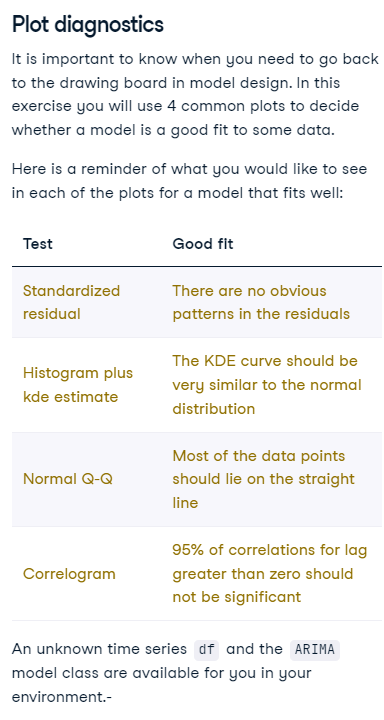

In [11]:
# 퀴즈 3-3-1

# Create and fit model
model = ARIMA(df, order=(1,1,1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

NameError: ignored

퀴즈 3-3-1 결과 plot
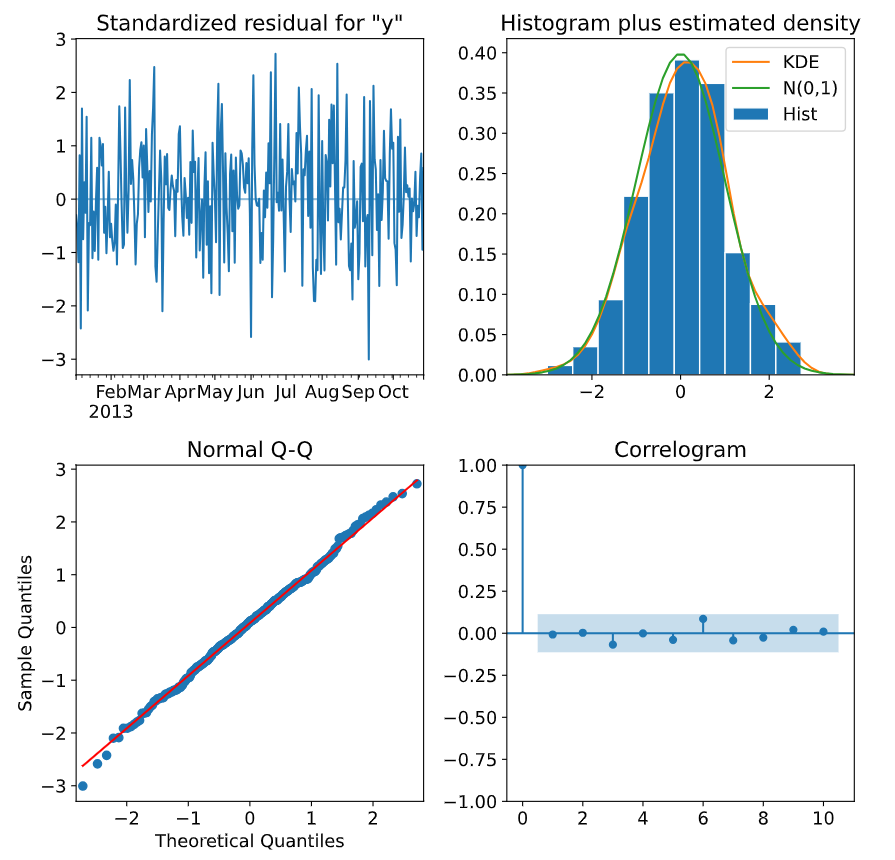

In [12]:
# 퀴즈 3-3-2

# The residuals are not normally distributed. -< qq plot을 보면 normally distributed.
# The residuals are correlated. You should increase p or q. -> 틀림.

In [13]:
# 퀴즈 3-3-3
# 다른 4가지 플롯 세트가 나오는데 normal q-q 를 따르지 않는 residual 분포를 나타냄.

# The Bo-Jenkins method

* From raw data -> production model 을 위한 체크리스트.

* identification / estimation / model diagnostics

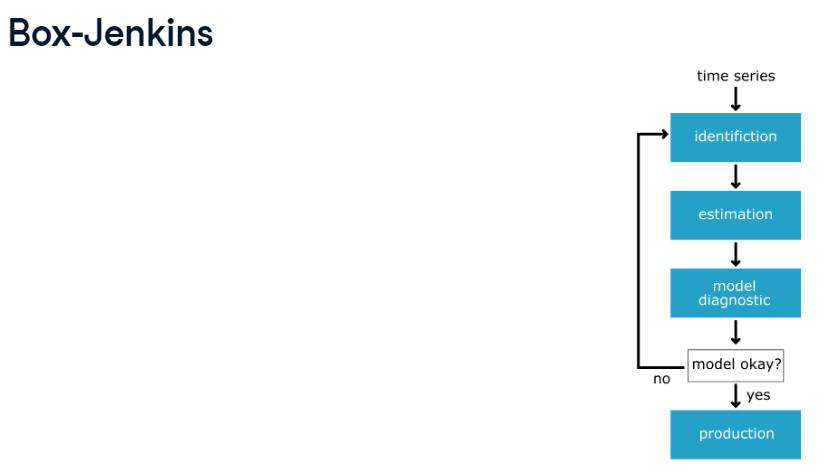


## Identification

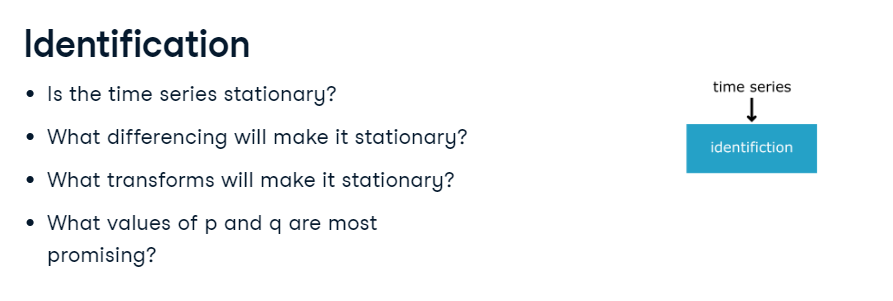

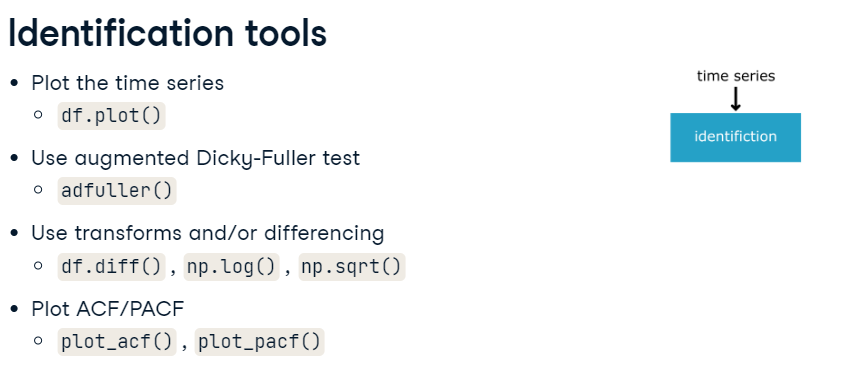

## Estimation

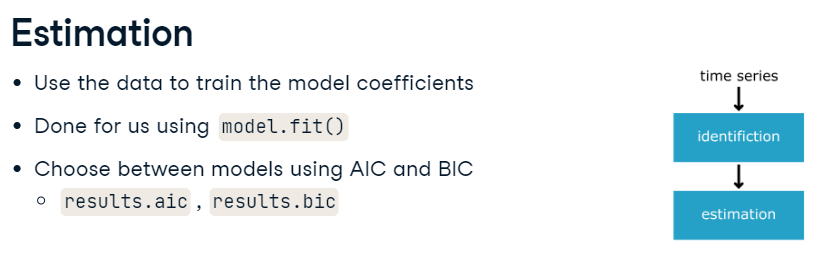

## Model diagnostics

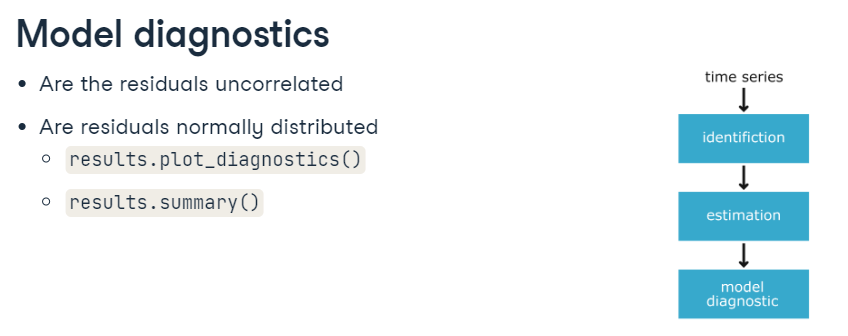

## Decision & Repeat

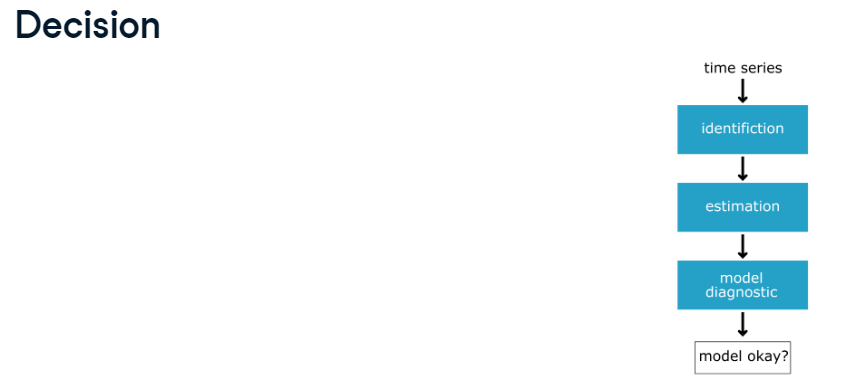

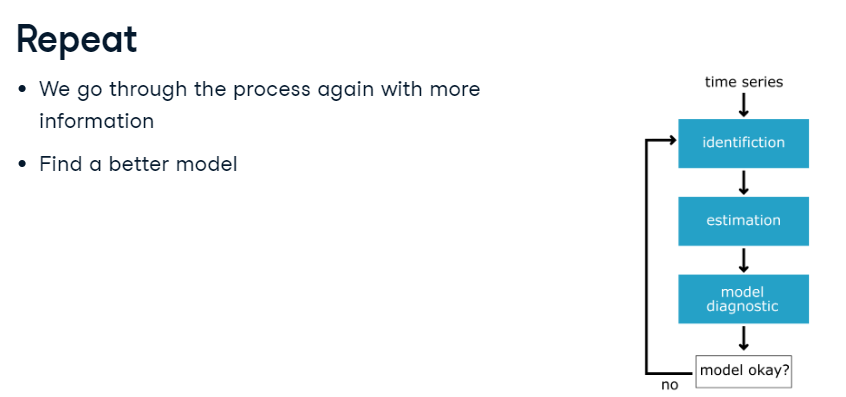



## production

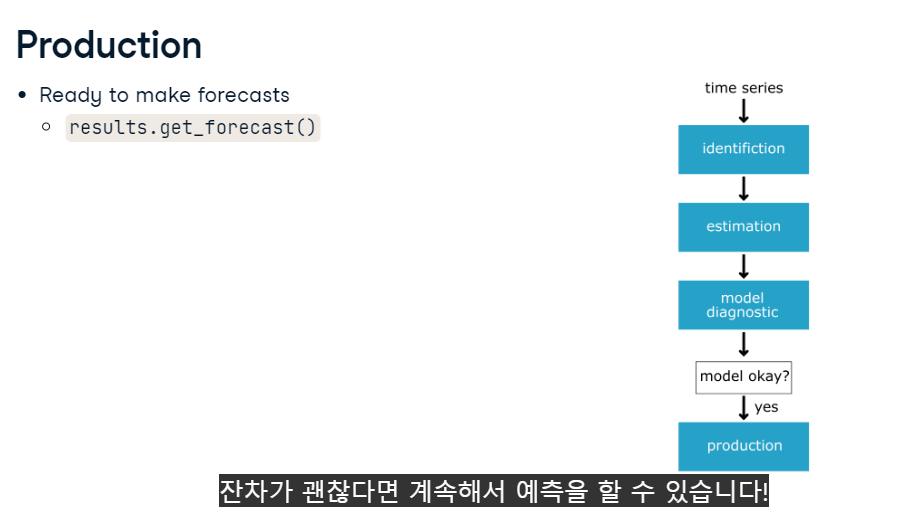


In [14]:
# 퀴즈 4-1
# 퀴즈 4는 이번 강의에 배운걸 하나의 흐름으로 확인하는 과정.
# 해당 퀴즈 introduction 들을 살펴보면서 다시 한번 복기하는 것을 추천.

# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

NameError: ignored

4-1 plot

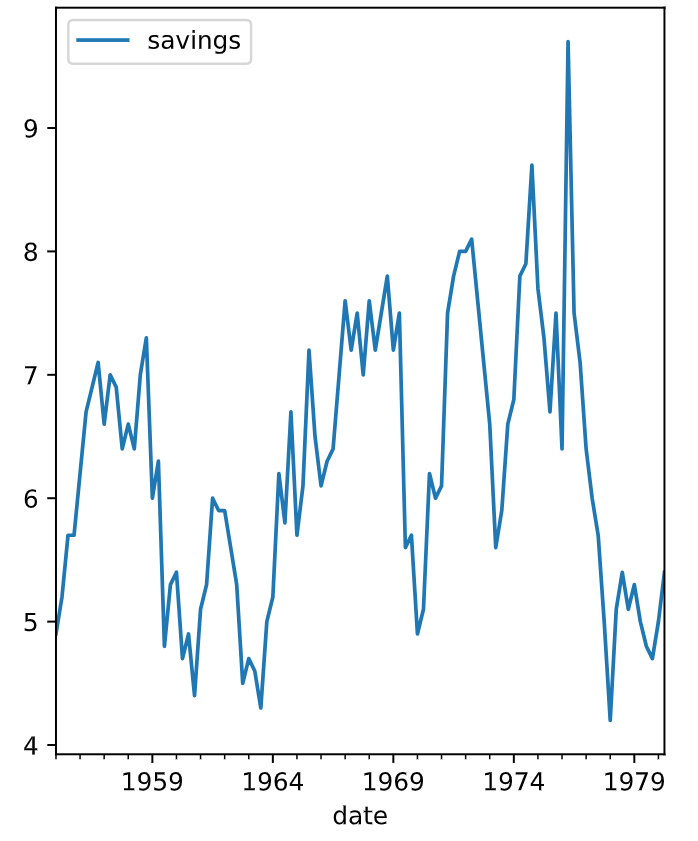

In [15]:
# 퀴즈 4-2

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()

NameError: ignored

퀴즈 4-2 plot

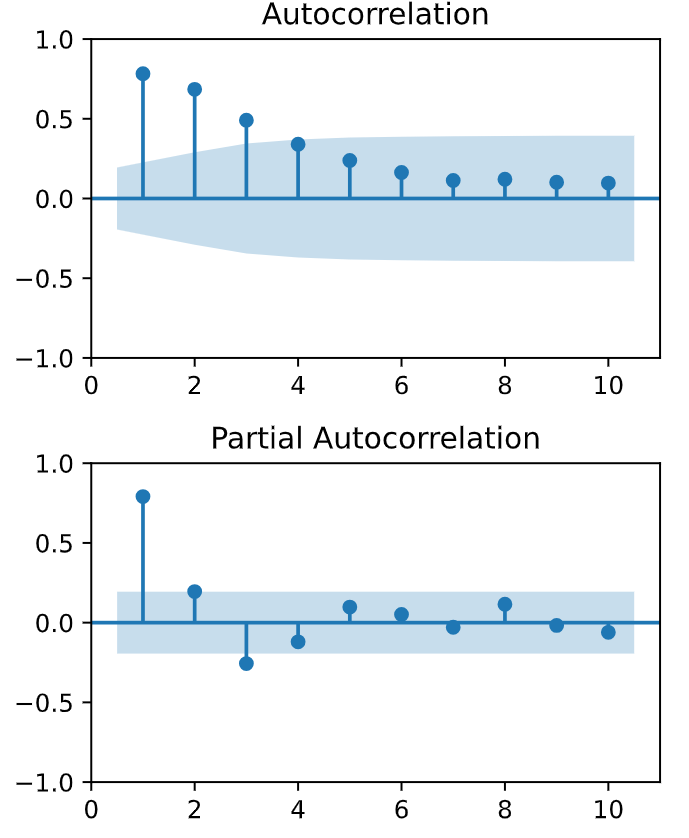

In [17]:
#퀴즈 4-3

# Loop over p values from 0-3
for p in range(4):

  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(savings, order=(p,0,q))
        results = model.fit()

        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)

      except:
        print(p, q, None, None)


# 0 0 313.6028657381061 318.85281136467466
# 0 1 267.06970980844704 274.94462824829986
# 0 2 232.16782677363798 242.66771802677508
# 0 3 217.59720509753365 230.72206916395498
# 1 0 216.203479563773 224.0783980036258
# 1 1 215.7003889529165 226.2002802060536
# 1 2 207.6529838444748 220.77784791089613
# 1 3 209.57498315813876 225.3248200378444
# 2 0 213.97232199692382 224.47221325006092
# 2 1 213.4303586787578 226.55522274517915
# 2 2 209.57903144324032 225.32886832294594
# 2 3 211.57498195187546 229.94979164486534
# 3 0 209.54492936717307 222.6697934335944
# 3 1 210.82147284903212 226.57130972873773
# 3 2 211.45759548497693 229.83240517796682
# 3 3 213.35650857579535 234.3562910820695

0 0 None None
0 1 None None
0 2 None None
0 3 None None
1 0 None None
1 1 None None
1 2 None None
1 3 None None
2 0 None None
2 1 None None
2 2 None None
2 3 None None
3 0 None None
3 1 None None
3 2 None None
3 3 None None


In [18]:
#퀴즈 4-4
# Create and fit model
model = ARIMA(savings, order=(1,0,2))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())


# <script.py> output:
#                                    SARIMAX Results
#     ==============================================================================
#     Dep. Variable:                savings   No. Observations:                  102
#     Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -98.826
#     Date:                Fri, 18 Aug 2023   AIC                            207.653
#     Time:                        09:26:35   BIC                            220.778
#     Sample:                    01-01-1955   HQIC                           212.968
#                              - 04-01-1980
#     Covariance Type:                  opg
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     const          6.1949      0.323     19.169      0.000       5.561       6.828
#     ar.L1          0.7284      0.111      6.534      0.000       0.510       0.947
#     ma.L1         -0.0538      0.145     -0.370      0.711      -0.338       0.231
#     ma.L2          0.3681      0.097      3.814      0.000       0.179       0.557
#     sigma2         0.4012      0.043      9.264      0.000       0.316       0.486
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                55.12
#     Prob(Q):                              0.89   Prob(JB):                         0.00
#     Heteroskedasticity (H):               2.61   Skew:                             0.82
#     Prob(H) (two-sided):                  0.01   Kurtosis:                         6.20
#     ===================================================================================

NameError: ignored

퀴즈 4-4 plot

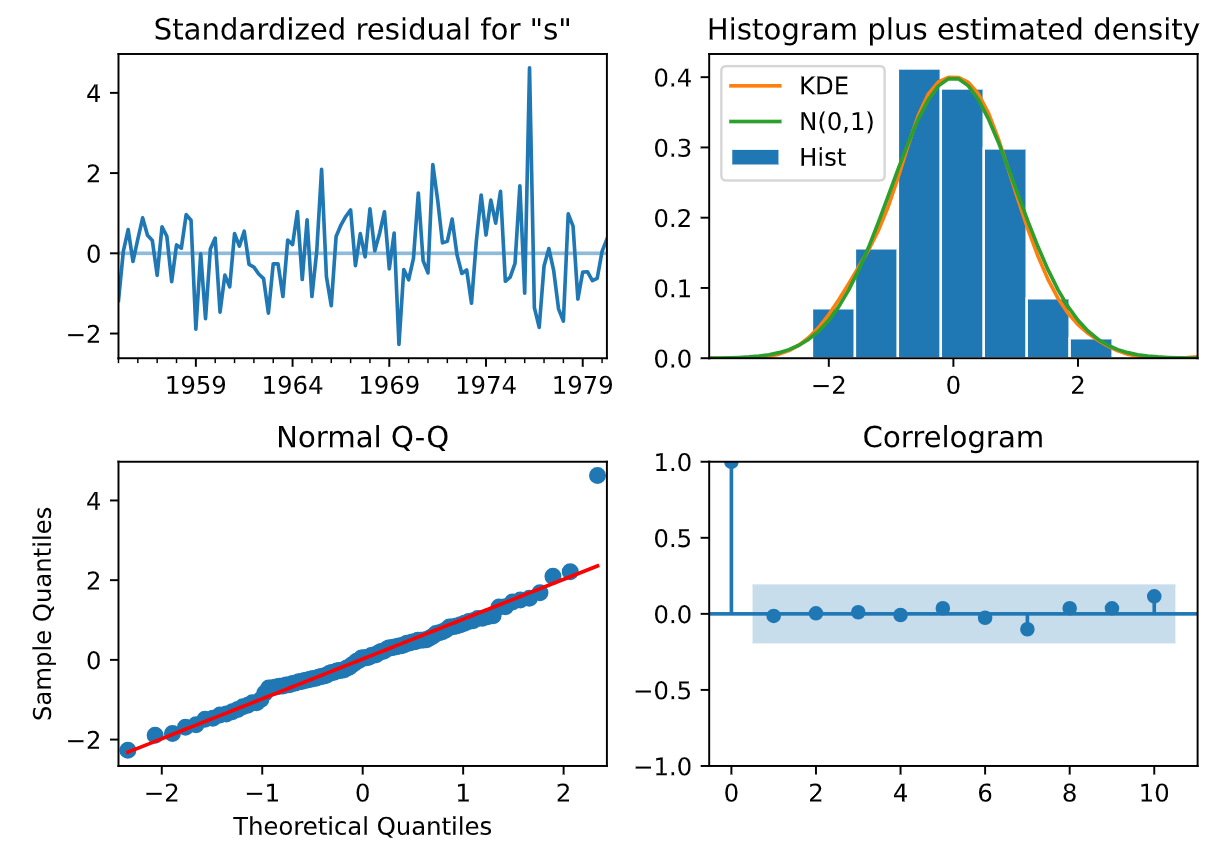